In [5]:
from utils import log_out, plot_graphs, DataReader, adaboost_loss
from carrot import Carrot
from booster import Booster

from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from random import shuffle
%matplotlib inline

In [2]:
reader = DataReader()
X_train, Y_train = reader.get(dtype = "train", ttype = "classification")
X_test, Y_test = reader.get(dtype = "test", ttype = "classification")

 38%|███▊      | 2717/7093 [00:00<00:00, 27161.02it/s]

Start reading data ...


 24%|██▍       | 2454/10056 [00:00<00:00, 24535.11it/s]

End reading data ...
Normalising data ...
Start reading data ...


100%|██████████| 10056/10056 [00:00<00:00, 25945.68it/s]


End reading data ...
Normalising data ...


Learning estimator number: 9/10; AdaboostLoss error on train dataset: 0.558763957430948; MSE error on train dataset: 0.156929817766374195


my AdaboostLoss: 0.5273


 11%|█         | 1/9 [00:35<04:42, 35.31s/it]

sklearn AdaboostLoss: 0.5439


Learning estimator number: 19/20; AdaboostLoss error on train dataset: 0.5198370071648998; MSE error on train dataset: 0.07121096877377665


my AdaboostLoss: 0.5308


 22%|██▏       | 2/9 [01:23<04:50, 41.51s/it]

sklearn AdaboostLoss: 0.5161


Learning estimator number: 29/30; AdaboostLoss error on train dataset: 0.5081358442963083; MSE error on train dataset: 0.03869457516498705


my AdaboostLoss: 0.5190


 33%|███▎      | 3/9 [02:11<04:22, 43.77s/it]

sklearn AdaboostLoss: 0.5176


Learning estimator number: 39/40; AdaboostLoss error on train dataset: 0.5038903117819885; MSE error on train dataset: 0.04939110062518598


my AdaboostLoss: 0.5239


 44%|████▍     | 4/9 [02:55<03:39, 43.95s/it]

sklearn AdaboostLoss: 0.5117


Learning estimator number: 49/50; AdaboostLoss error on train dataset: 0.5018023314314926; MSE error on train dataset: 0.034670636547247145


my AdaboostLoss: 0.5200


 56%|█████▌    | 5/9 [03:42<02:57, 44.41s/it]

sklearn AdaboostLoss: 0.5107


Learning estimator number: 59/60; AdaboostLoss error on train dataset: 0.5010483435527803; MSE error on train dataset: 0.046838805131408426


my AdaboostLoss: 0.5200


 67%|██████▋   | 6/9 [04:32<02:16, 45.34s/it]

sklearn AdaboostLoss: 0.5117


Learning estimator number: 69/70; AdaboostLoss error on train dataset: 0.5005050387248218; MSE error on train dataset: 0.07416153334514321


my AdaboostLoss: 0.5181


 78%|███████▊  | 7/9 [05:21<01:31, 45.89s/it]

sklearn AdaboostLoss: 0.5122


Learning estimator number: 79/80; AdaboostLoss error on train dataset: 0.5002270859569766; MSE error on train dataset: 0.079489308271127054


my AdaboostLoss: 0.5244


 89%|████████▉ | 8/9 [06:11<00:46, 46.39s/it]

sklearn AdaboostLoss: 0.5107


Learning estimator number: 89/90; AdaboostLoss error on train dataset: 0.5000965223323681; MSE error on train dataset: 0.061527665632389176


my AdaboostLoss: 0.5254


100%|██████████| 9/9 [07:03<00:00, 47.07s/it]

sklearn AdaboostLoss: 0.5117


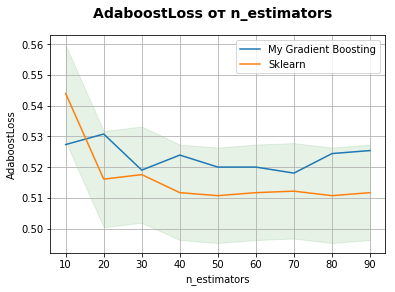

In [6]:
losses_my = list()
losses_sklearn = list()
trees_num = [x * 10 for x in range(1, 10)]


estimators_list = None
global_leaf_numbers = None
F = None
node_weights = None
b = 0.5

ind_list = [i for i in range(len(X_train))]
shuffle(ind_list)

for i in tqdm(trees_num):
    algo1 = Booster(n_estimators=i, min_samples_split=4, max_depth=3,
                              estimators_list=estimators_list,
                              F=F,
                              global_leaf_numbers=global_leaf_numbers,
                              node_weights= node_weights,
                    b = b)
    b*=0.5
    estimators_list, F, global_leaf_numbers, node_weights = algo1.fit(X_train[ind_list, :],
                                                                      Y_train[ind_list])



    aloss = adaboost_loss(Y_test, algo1.predict(X_test))
    losses_my.append(aloss)
    print("\nmy AdaboostLoss: %.4f" % aloss)

    algo = GradientBoostingClassifier(n_estimators=i,
                                      max_depth=3,
                                      min_samples_split=4,
                                      loss="exponential")
    algo.fit(X_train, Y_train)
    aloss = adaboost_loss(Y_test, algo.predict(X_test))
    losses_sklearn.append(aloss)
    print("sklearn AdaboostLoss: %.4f" % aloss)

plot_graphs(trees_num, losses_my, losses_sklearn)